#CSI41412 Assignment 1: Mobile Data Usage Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('user_behavior_dataset.csv')
print("--- Head of the Dataset ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- Head of the Dataset ---
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47 

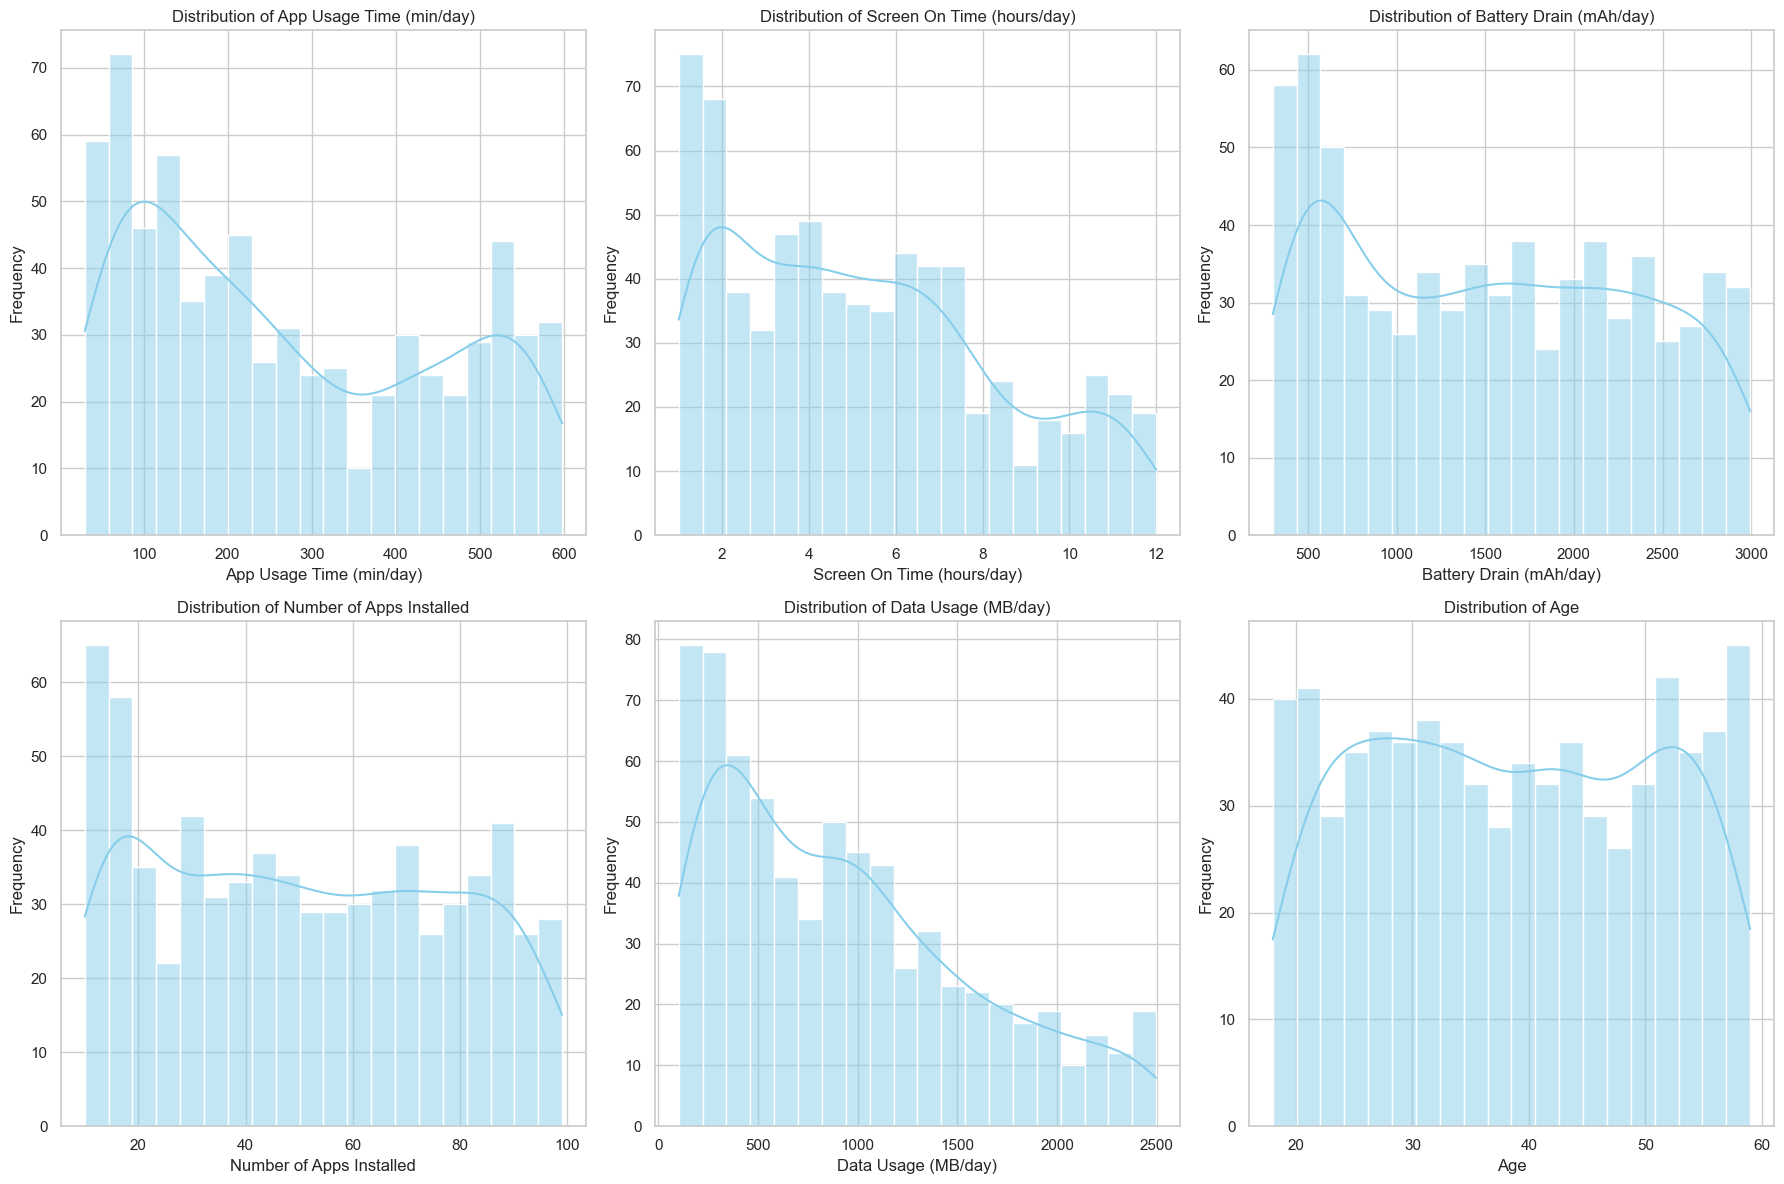

In [ ]:
sns.set(style="whitegrid")

# 3. Univariate Analysis: Numerical Features Distribution
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                  'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                  'Data Usage (MB/day)', 'Age']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/1790930804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/1790930804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/1790930804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipy

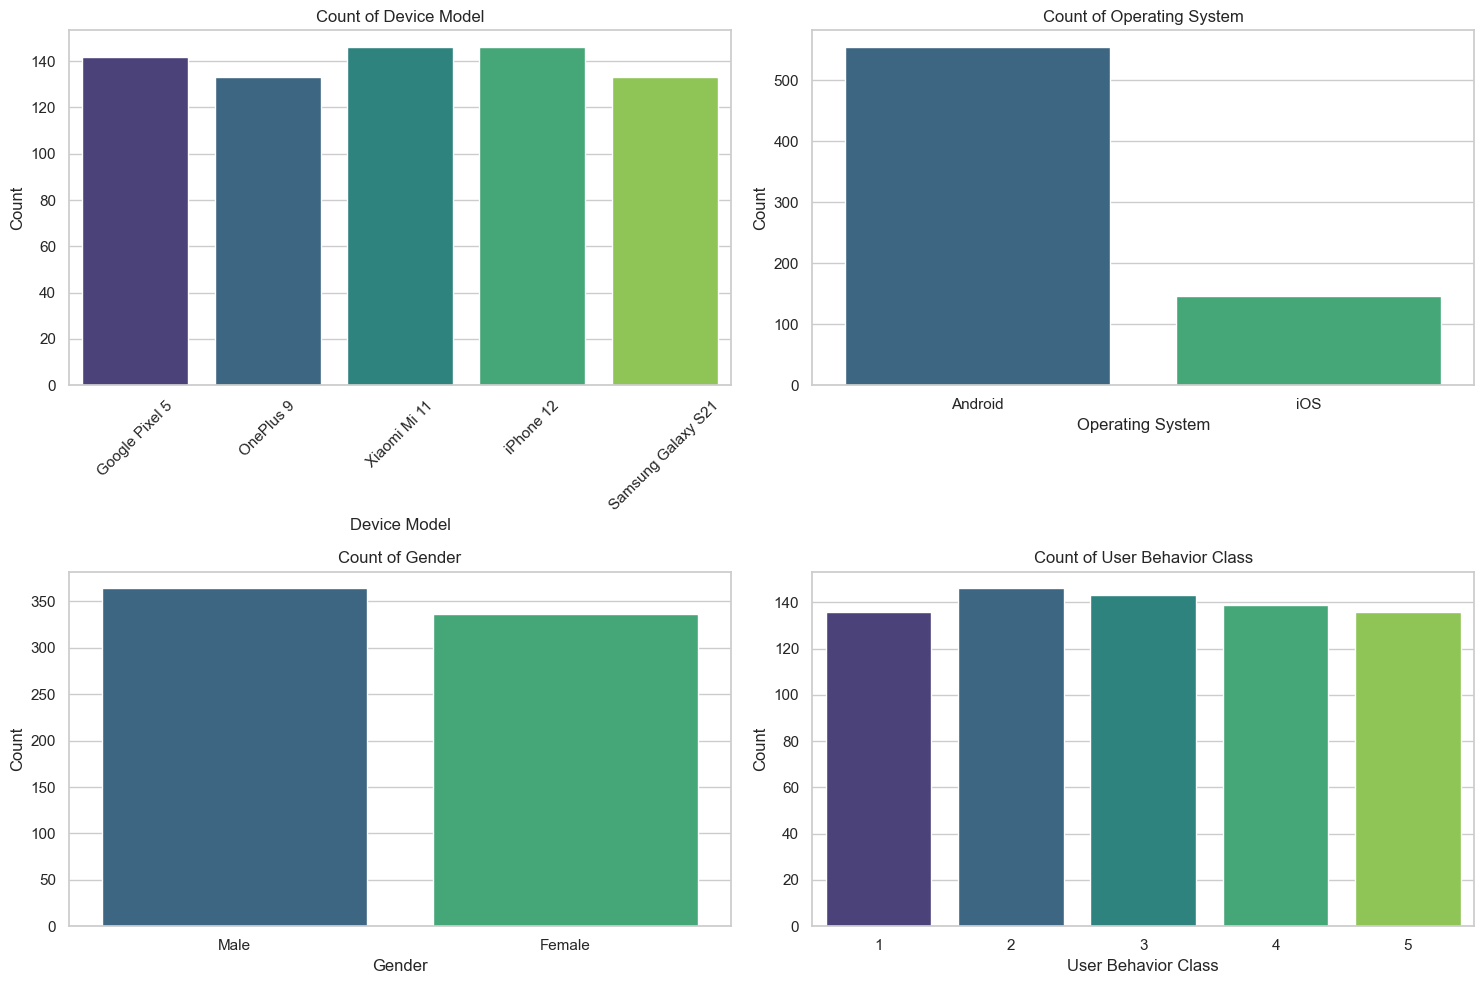

In [ ]:
# 4. Univariate Analysis: Categorical Features Counts
categorical_cols = ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if col == 'Device Model': # Rotate labels for better readability
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


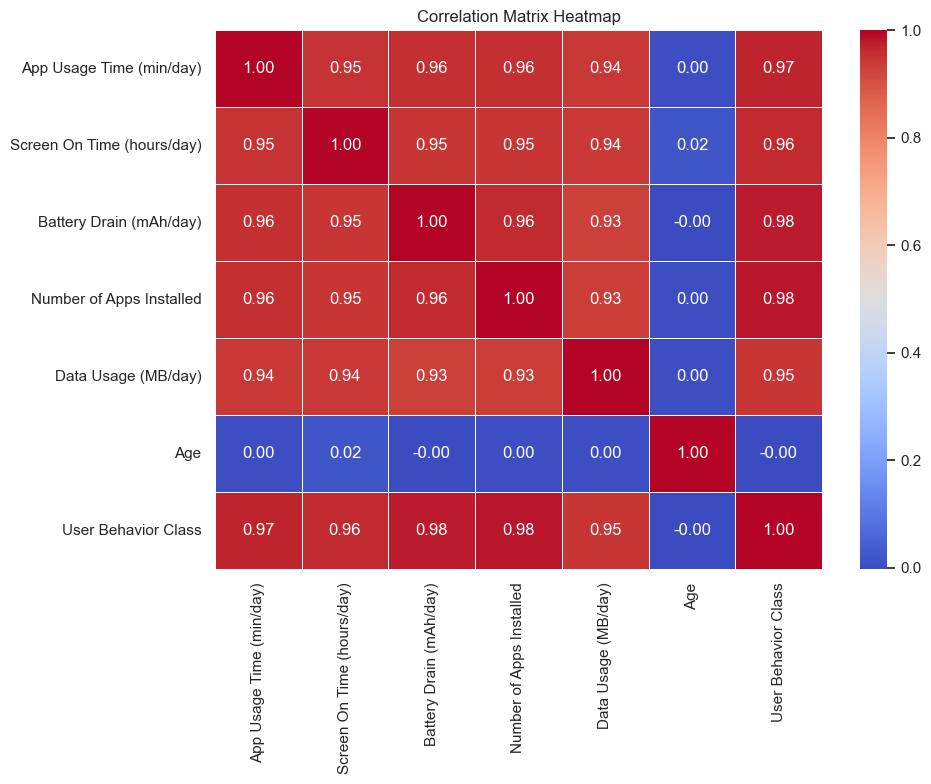

In [ ]:
# 5. Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])


if 'User ID' in numeric_df.columns:
    numeric_df = numeric_df.drop('User ID', axis=1)

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/3699659422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/3699659422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
/var/folders/3w/1_sy9lz53_d08dv59ywyyw700000gn/T/ipykernel_19226/3699659422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette=

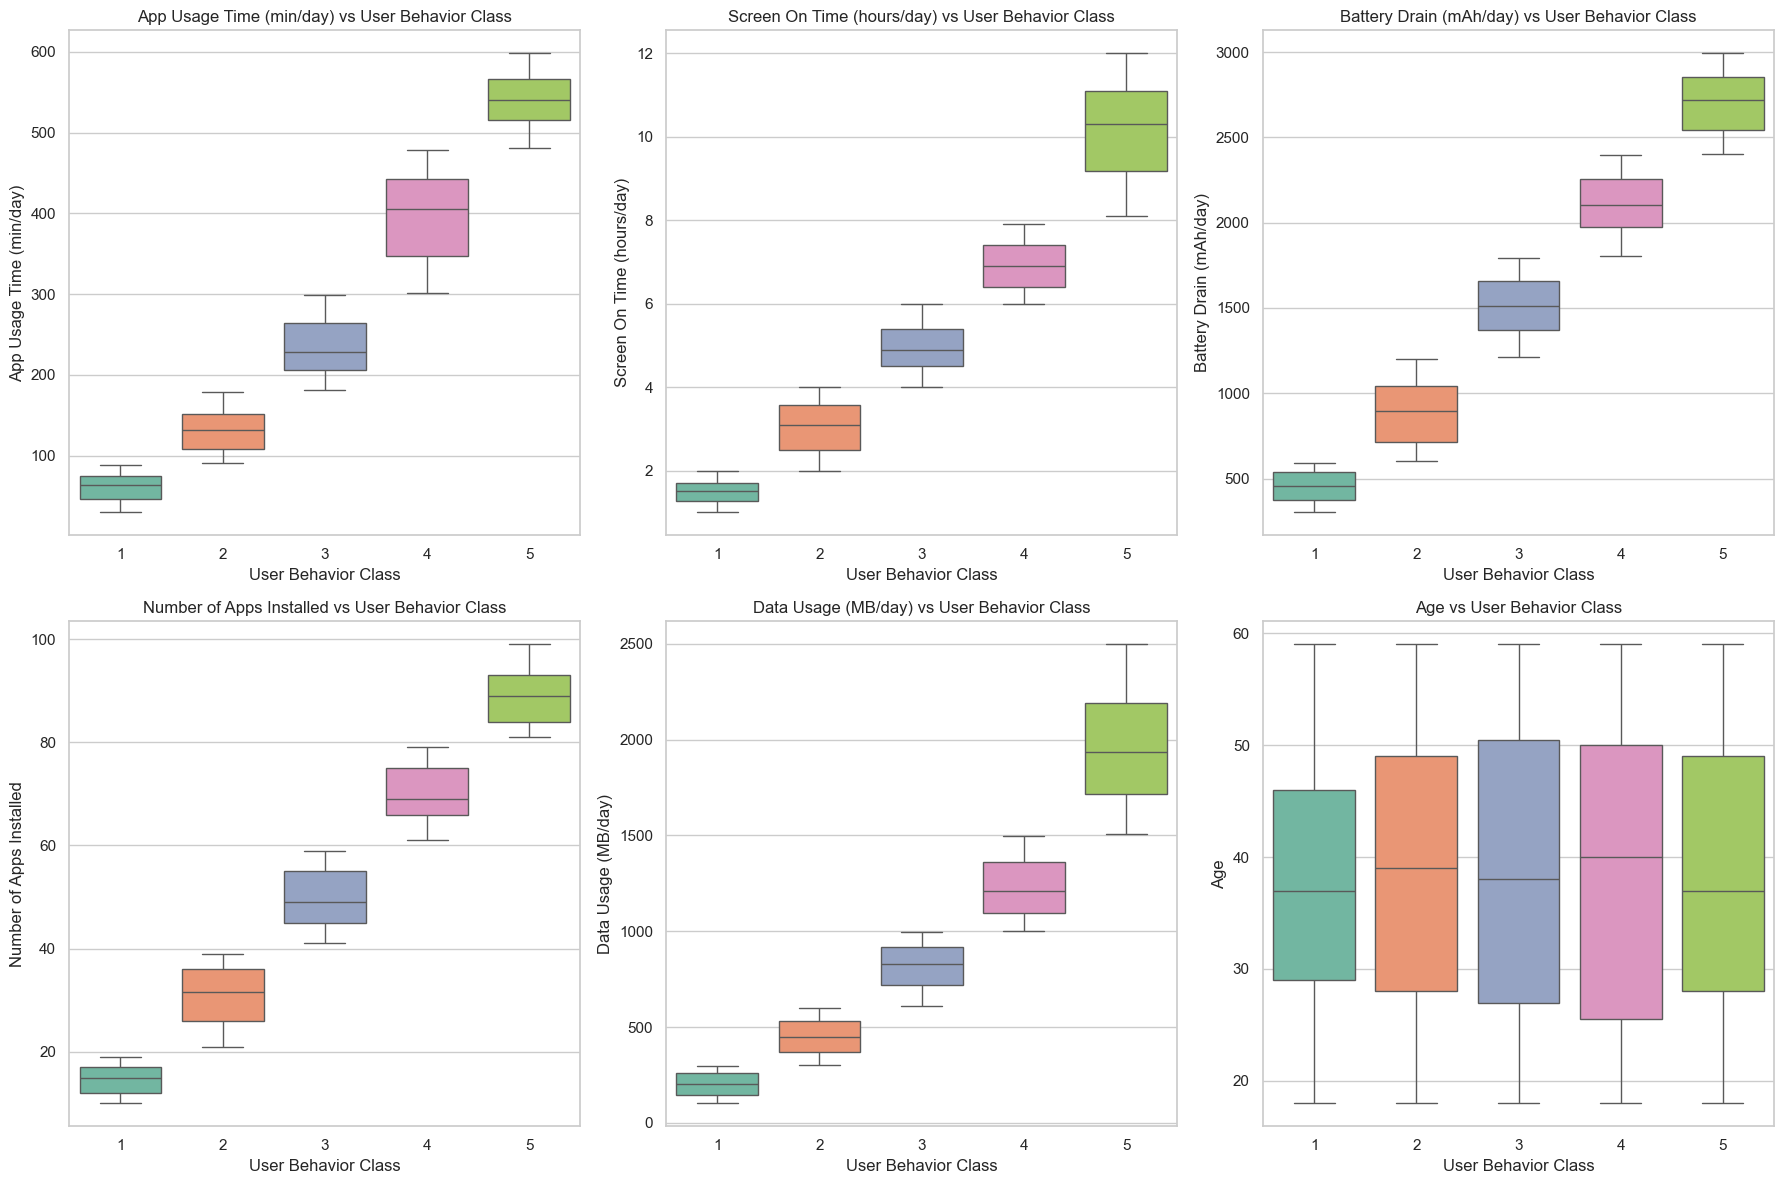

In [ ]:
# 6. Bivariate Analysis: Relationship with User Behavior Class
# Using boxplots to see how usage metrics differ across behavior classes
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
    plt.title(f'{col} vs User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel(col)
plt.tight_layout()
plt.show()